In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from sklearn.model_selection import cross_validate, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"./data/NBA_Dataset.csv")

In [3]:
df.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


In [4]:
print("Quatidade de colunas no dataframe:",len(df.columns))

Quatidade de colunas no dataframe: 55


In [5]:
df.columns

Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share', 'mov',
       'mov_adj', 'win_loss_pct'],
      dtype='object')

In [6]:
buffer = io.StringIO()
df.info(buf=buffer, verbose=True)
s = buffer.getvalue()
with open("df_info_total.txt", "w", encoding="utf-8") as f:
    f.write(s)

In [7]:
df['Voted'] = np.where(df['award_share'] > 0, "1", "0")
indicados = df[df['Voted'] == '1']
print("Quantidade de jogadores:", len(df['player'].unique()), "Quantidade de jogadores indicados para mvp:",len(indicados['player'].unique()), "Primeiro ano:", int(df['season'].min()),
"Último ano:", int(df['season'].max()))

Quantidade de jogadores: 3283 Quantidade de jogadores indicados para mvp: 187 Primeiro ano: 1982 Último ano: 2022


In [8]:
max_season = df.groupby(['season'])['award_share'].agg(max)
mvp = pd.merge(left = df, right= max_season, on = ['season','award_share'], how = "inner")
mvp.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,Voted
0,1982,Moses Malone,C,26,HOU,81,81,42.0,11.7,22.5,...,0.218,6.2,-1.8,4.5,5.5,0.735,-0.04,-0.39,0.561,1
1,1983,Moses Malone,C,27,PHI,78,78,37.5,8.4,16.7,...,0.248,4.0,-0.3,3.7,4.2,0.960,7.67,7.53,0.793,1
2,1984,Larry Bird,PF,27,BOS,79,77,38.3,9.6,19.5,...,0.215,5.6,2.0,7.6,7.3,0.858,6.56,6.42,0.756,1
3,1985,Larry Bird,SF,28,BOS,80,77,39.5,11.5,22.0,...,0.238,6.8,2.0,8.8,8.7,0.978,6.65,6.47,0.768,1
4,1986,Larry Bird,SF,29,BOS,82,81,38.0,9.7,19.6,...,0.244,6.6,2.1,8.7,8.4,0.981,9.41,9.06,0.817,1


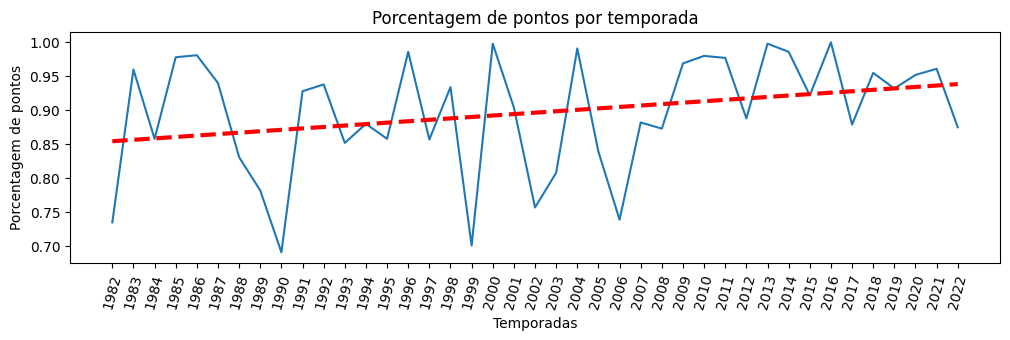

In [9]:
x = mvp['season']
y = mvp['award_share']
fig, ax = plt.subplots(figsize=(12,3))
plt.plot(x, y)  

plt.xticks(x)
plt.setp(ax.get_xticklabels(), rotation = 75)
plt.xlabel("Temporadas")
plt.ylabel("Porcentagem de pontos")
plt.title("Porcentagem de pontos por temporada")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", linewidth=3, linestyle="--")

plt.show()

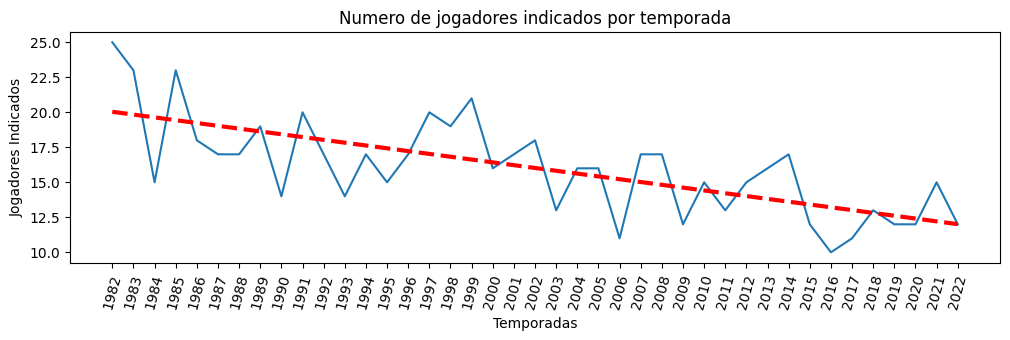

In [10]:
contagem = df.copy()
contagem['Voted'] = contagem['Voted'].astype(int)
contagem = contagem.groupby(['season'])['Voted'].agg(sum)

x = df['season'].unique()
y = contagem
fig, ax = plt.subplots(figsize=(12,3))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y)  

plt.xticks(x)
plt.setp(ax.get_xticklabels(), rotation = 75)
plt.xlabel("Temporadas")
plt.ylabel("Jogadores Indicados")
plt.title("Numero de jogadores indicados por temporada")

plt.plot(x, p(x), color="red", linewidth=3, linestyle="--")

plt.show()

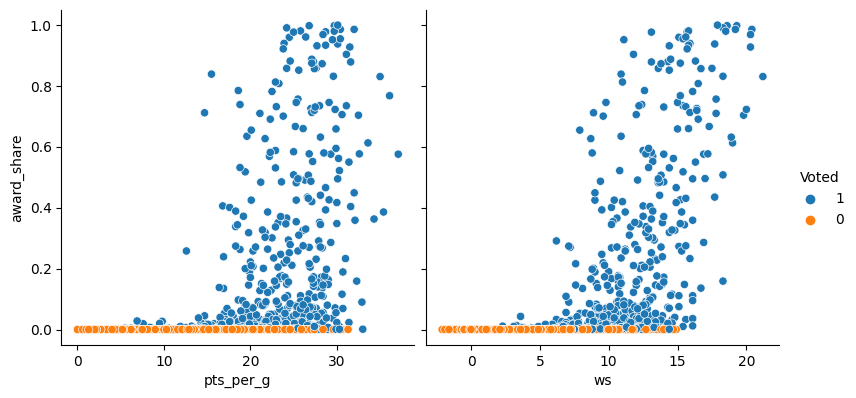

In [11]:

sns.pairplot(df, x_vars=['pts_per_g', 'ws'], y_vars='award_share', height=4, aspect=1, kind='scatter', hue = 'Voted', diag_kind=None)
# sns.set_theme(font_scale=9.0)
plt.show()

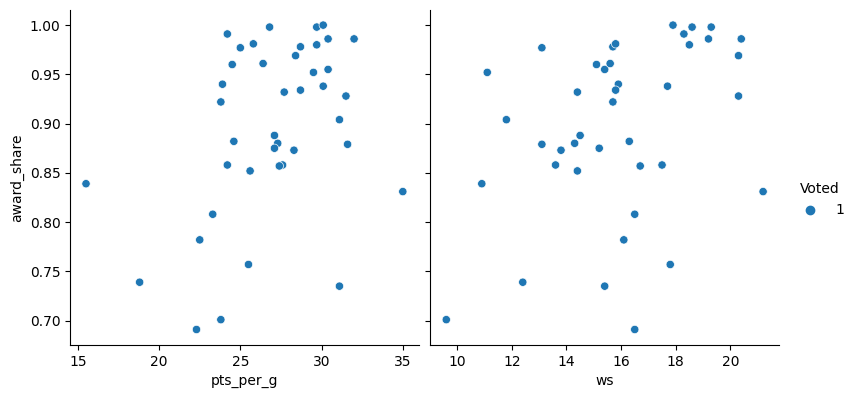

In [12]:
sns.pairplot(mvp, x_vars=['pts_per_g', 'ws'], y_vars='award_share', height=4, aspect=1, kind='scatter', hue = 'Voted', diag_kind=None)
# sns.set_theme(font_scale=9.0)
plt.show()

In [13]:
print('Award shares dos últimos 5 anos')
mvp[['season','award_share']].sort_values(by ='season', ascending= False)[0:5]

Award shares dos últimos 5 anos


,season,award_share
40,2022,0.875
39,2021,0.961
38,2020,0.952
37,2019,0.932
36,2018,0.955


In [14]:
print('Top 5 Anos com maiores award shares')
mvp[['season','award_share']].sort_values(by ='award_share', ascending= False)[0:5]

Top 5 Anos com maiores award shares


,season,award_share
34,2016,1.000
18,2000,0.998
31,2013,0.998
22,2004,0.991
32,2014,0.986


In [15]:
#Filtrando os dados, onde ao menos o jogador deve ter jogado em uma partida na temporada e 
#jogado por ao menos o tempo de 1 quarto (12 min) durante toda a temporada.#

df = df[df['g'] > 0]
df = df[df['mp'] > 12]

In [16]:
matrix = indicados.corr(numeric_only = True)['award_share'].round(2)
matrix.to_excel("correlacao_indicados.xlsx")
matrix = df.corr(numeric_only = True).round(2)
matrix.to_excel("correlacao_geral.xlsx")

In [17]:
df.dropna(inplace = True)
df.drop(['team_id','Voted','pos'], axis=1, inplace = True)  
# Correlation map
df_corr = df.drop(['player','season'], axis=1)  
plt.figure(figsize=(40, 40))
sns.heatmap(df_corr.corr().round(decimals=2), annot=True, center=0.0, vmin=-1.0, vmax=1.0, robust=True, cmap="Spectral")

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(rotation='horizontal', rotation_mode="anchor")
plt.savefig("correlacao_heatmap.svg", format='svg', dpi = 400)
plt.close()

In [18]:
matrix_mvp = mvp.corr(numeric_only = True)['award_share'].round(2)
matrix_mvp.to_excel("correlacao_mvp.xlsx")

In [19]:

X = df.drop(['player','award_share'], axis=1)  
y = df[['award_share']]


In [20]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [ ]:
N = len(X)
# Define the range of k values to test
k_values = range(1, N)  # N is the total number of features

# Define the regression models to evaluate
models = [LinearRegression(), SVR(), RandomForestRegressor()]

# Define the parameter grid for grid search
param_grid = {'k_best__k': k_values}

# Initialize a cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model in models:
    # Create a pipeline with SelectKBest and the regression model
    pipeline = Pipeline([
        ('k_best', SelectKBest(score_func=f_regression)),
        ('regression', model)
    ])

    # Perform a grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, n_jobs= 7, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    # Get the best value of k from the grid search
    best_k = grid_search.best_params_['k_best__k']

    # Print the results
    print(f"Model: {model.__class__.__name__}, Best k: {best_k}, Best MSE: {abs(grid_search.best_score_)}")


In [21]:
# Creating the selector for featrue extraction
f_regression_features = SelectKBest(f_regression, k=33)

# X = f_regression_features.fit_transform(reg_features, y_reg)
        
# Fitting the selector
Z = df.drop(['player','season'], axis=1)  
f_regression_features.fit(Z, y)
# Get columns to keep and create new dataframe with those only
cols = f_regression_features.get_support(indices=True)
X = X.iloc[:,cols]
feature_names = X.columns
print(f"Colunas escolhidas: {feature_names}")


Colunas escolhidas: Index(['g', 'gs', 'mp_per_g', 'fg_per_g', 'fg3_pct', 'fg2_per_g', 'efg_pct',
       'ft_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'pf_per_g', 'pts_per_g', 'mp',
       'per', 'trb_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48',
       'obpm', 'dbpm', 'bpm', 'vorp', 'mov', 'mov_adj', 'win_loss_pct'],
      dtype='object')


In [22]:
# Function for K fold cross validation
def cross_validation_scores(model, X, y, scoring, CV):    
    '''
    Cross-validation metrics
    
    param_model: model
    param_X: features
    param_y: target label
    param_scoring: a selection of metrics
    param_CV: how many folds for cross validation
    '''
    # K-fold Cross Validation
    scores = cross_validate(model, X, y.values.ravel(), scoring=scoring, cv=CV, n_jobs = -1)

    # Getting the score mean and standard deviation of each metric
    return {metric: (round(np.mean(scores), 3),
                     [round(np.std(scores), 3)]) for metric, scores in scores.items()}

In [23]:
# scoring metrics for regression
regression_scores = {'R^2 score' : 'r2',
                     'Explained Variance':'explained_variance',
                     'MSE':'neg_mean_squared_error',
                     'RMSE' : make_scorer(mean_squared_error, squared=False),
                     }

In [24]:
rf_reg = RandomForestRegressor(random_state=0,
                               n_estimators=200,
                               criterion='squared_error')

print('Random Forest Regressor 10-fold cross validation metrics: ' )
rf_report = cross_validation_scores(rf_reg, X, y, regression_scores, 10)
rf_report

Random Forest Regressor 10-fold cross validation metrics: 


{'fit_time': (100.648, [7.207]),
 'score_time': (0.069, [0.014]),
 'test_R^2 score': (0.698, [0.108]),
 'test_Explained Variance': (0.698, [0.108]),
 'test_MSE': (-0.001, [0.0]),
 'test_RMSE': (0.035, [0.006])}

In [25]:
lin_reg = LinearRegression()
print('Linear Regression 10-fold cross validation metrics: ')
linreg_report = cross_validation_scores(lin_reg, X, y, regression_scores, 10)
linreg_report

Linear Regression 10-fold cross validation metrics: 


{'fit_time': (0.041, [0.013]),
 'score_time': (0.005, [0.001]),
 'test_R^2 score': (0.289, [0.061]),
 'test_Explained Variance': (0.29, [0.062]),
 'test_MSE': (-0.003, [0.0]),
 'test_RMSE': (0.054, [0.003])}

In [26]:
svr_reg = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.1)
print('SVR 10-fold cross validation metrics: ' )
svr_report = cross_validation_scores(svr_reg, X, y, regression_scores, 10)
svr_report

SVR 10-fold cross validation metrics: 


{'fit_time': (1.724, [0.272]),
 'score_time': (0.226, [0.038]),
 'test_R^2 score': (0.102, [0.193]),
 'test_Explained Variance': (0.341, [0.145]),
 'test_MSE': (-0.004, [0.001]),
 'test_RMSE': (0.06, [0.005])}

In [27]:
def model_report(data, name='name'):
    '''
    a utility function to create a dataframe with the scoring metrics of the estimators
    param data: the scoring a model
    param name: the name of the estimator on the table
    '''
    df = pd.DataFrame()
    df = pd.DataFrame.from_dict([data])
    df['Model'] = name
    df = df.set_index('Model')
   
    return df

r_report = pd.DataFrame()
r_report = pd.concat([r_report, model_report(linreg_report, name='Linear Regression')])
r_report = pd.concat([r_report, model_report(svr_report, name='SVR')])
r_report = pd.concat([r_report, model_report(rf_report, name='Random Forest')])
r_report.sort_values(by=['test_RMSE'], ascending=True)

,fit_time,score_time,test_R^2 score,test_Explained Variance,test_MSE,test_RMSE
Model,,,,,,
Random Forest,"(100.648, [7.207])","(0.069, [0.014])","(0.698, [0.108])","(0.698, [0.108])","(-0.001, [0.0])","(0.035, [0.006])"
Linear Regression,"(0.041, [0.013])","(0.005, [0.001])","(0.289, [0.061])","(0.29, [0.062])","(-0.003, [0.0])","(0.054, [0.003])"
SVR,"(1.724, [0.272])","(0.226, [0.038])","(0.102, [0.193])","(0.341, [0.145])","(-0.004, [0.001])","(0.06, [0.005])"


In [41]:
df_pred = df[df['season'] == 2022]

rf_reg.fit(X, y.values.ravel())

rfPredict = rf_reg.predict(df_pred[feature_names] ).round(decimals=4)
# Pair the names and predictions
rfListUnsorted = [[i, j] for i, j in zip(df_pred['player'], rfPredict)]
rfList = sorted(rfListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
rf_df = pd.DataFrame(rfList)
rf_df.rename(columns = {0:'Player Name', 1:'Award Share RF'}, inplace=True)

rf_df.index = rf_df.index + 1
rf_df[0:5]

,Player Name,Award Share RF
1,Anthony Davis,0.7165
2,Mookie Blaylock,0.7119
3,Kevin Durant,0.7113
4,Kawhi Leonard,0.7108
5,Nikola Jokić,0.7095


In [37]:
df_pred = df[df['season'] == 2022]

lin_reg.fit(X, y.values.ravel())

linPredict = lin_reg.predict(df_pred[feature_names] ).round(decimals=4)
# Pair the names and predictions
linListUnsorted = [[i, j] for i, j in zip(df_pred['player'], linPredict)]
linList = sorted(linListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
lin_df = pd.DataFrame(linList)
lin_df.rename(columns = {0:'Player Name', 1:'Award Share Lin'}, inplace=True)

lin_df.index = lin_df.index + 1
lin_df[0:5]

,Player Name,Award Share Lin
1,Jaylen Morris,-0.5824
2,Moses Wright,-0.6431
3,Sekou Doumbouya,-0.7097
4,George King,-0.7320
5,Wayne Selden,-0.7359


In [38]:
svr_reg.fit(X, y.values.ravel())

svrPredict = svr_reg.predict(df_pred[feature_names] ).round(decimals=4)
# Pair the names and predictions
svrListUnsorted = [[i, j] for i, j in zip(df_pred['player'], svrPredict)]
svrList = sorted(svrListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
svr_df = pd.DataFrame(svrList)
svr_df.rename(columns = {0:'Player Name', 1:'Award Share SVR'}, inplace=True)

svr_df.index = svr_df.index + 1
svr_df[0:5]

,Player Name,Award Share SVR
1,Precious Achiuwa,0.1694
2,Steven Adams,0.1694
3,Bam Adebayo,0.1694
4,Santi Aldama,0.1694
5,LaMarcus Aldridge,0.1694


In [39]:
# Colocando juntas todas as predições dos modelos
predict = pd.merge(lin_df, svr_df, on='Player Name')
predict = pd.merge(predict, rf_df, on='Player Name')


# Trocando o index
predict.index = predict.index + 1

predict.sort_values(by= 'Award Share RF',ascending= False, inplace = True)
predict[0:5]

,Player Name,Award Share Lin,Award Share SVR,Award Share RF
472,Joel Embiid,-88.9501,0.1694,0.6996
500,Nikola Jokić,-95.8797,0.1694,0.6974
460,Giannis Antetokounmpo,-85.2527,0.1694,0.6921
473,Luka Dončić,-89.1927,0.1694,0.6886
515,Jayson Tatum,-106.0806,0.1694,0.6135
